In [2]:
import numpy as np
import pandas as pd
import backtrader as bt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm 
from statsmodels.tsa.stattools import coint
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller  
import yfinance as yf
# import jugaad_data as jd

Getting historical data from yfinance api and preprocessing it

In [3]:
start = '2022-01-01'
end = '2024-04-01'

TATAMOTORS = yf.download('TATAMOTORS.NS', start=start, end=end)['Close']
RELIANCE = yf.download('RELIANCE.NS', start=start, end=end)['Close']
ONGC = yf.download('ONGC.NS', start=start, end=end)['Close']
HINDPETRO = yf.download('HINDPETRO.NS', start=start, end=end)['Close']
INFY = yf.download('INFY.NS', start=start, end=end)['Close']
BAJAJAUTO = yf.download('BAJAJ-AUTO.NS', start=start, end=end)['Close']
HEROMOTOCO = yf.download('HEROMOTOCO.NS', start=start, end=end)['Close']
ADANIGREEN = yf.download('ADANIGREEN.NS', start=start, end=end)['Close']
IRFC = yf.download('IRFC.NS', start=start, end=end)['Close']
ZOMATO = yf.download('ZOMATO.NS', start=start, end=end)['Close']
ALPHA = yf.download('ALPHA.NS', start=start, end=end)['Close']
BHARTIARTL = yf.download('BHARTIARTL.NS', start=start, end=end)['Close']
APOLLOHOSP = yf.download('APOLLOHOSP.NS', start=start, end=end)['Close']
APOLLOTYRE = yf.download('APOLLOTYRE.NS', start=start, end=end)['Close']
NIFTY = yf.download('^NSEI', start=start, end=end)['Close']
NIFTYBEES = yf.download('NIFTYBEES.NS', start=start, end=end)['Close']
HDFCBANK = yf.download('HDFCBANK.NS', start=start, end=end)['Close']
AXISBANK = yf.download('AXISBANK.NS', start=start, end=end)['Close']
ADANIENT = yf.download('ADANIENT.NS', start=start, end=end)['Close']
ATGL = yf.download('ATGL.NS', start=start, end=end)['Close']
PFC = yf.download('PFC.NS', start=start, end=end)['Close']
TATASTEEL = yf.download('TATASTEEL.NS', start=start, end=end)['Close']


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

In [4]:
df = pd.DataFrame({
    'TATAMOTORS': TATAMOTORS,
    'RELIANCE': RELIANCE,
    'ONGC': ONGC,
    'HINDPETRO': HINDPETRO,
    'INFY': INFY,
    'BAJAJAUTO': BAJAJAUTO,
    'HEROMOTOCO': HEROMOTOCO,
    'ADANIGREEN': ADANIGREEN,
    'IRFC': IRFC,
    'ZOMATO': ZOMATO,
    # 'ALPHA': ALPHA,
    'BHARTIARTL': BHARTIARTL,
    'APOLLOHOSP': APOLLOHOSP,
    'APOLLOTYRE': APOLLOTYRE,
    'NIFTY': NIFTY,
    'NIFTYBEES': NIFTYBEES,
    'HDFCBANK': HDFCBANK,
    'AXISBANK': AXISBANK,
    'ADANIENT': ADANIENT,
    'ATGL': ATGL,
    'PFC': PFC,
    'TATASTEEL': TATASTEEL
})

In [5]:
df

,TATAMOTORS,RELIANCE,ONGC,HINDPETRO,INFY,BAJAJAUTO,HEROMOTOCO,ADANIGREEN,IRFC,ZOMATO,...,APOLLOHOSP,APOLLOTYRE,NIFTY,NIFTYBEES,HDFCBANK,AXISBANK,ADANIENT,ATGL,PFC,TATASTEEL
Date,,,,,,,,,,,,,,,,,,,,,
2022-01-03,497.600006,2218.752686,143.050003,197.933334,1898.449951,3277.100098,2476.600098,1346.900024,23.049999,141.350006,...,4990.500000,220.899994,17625.699219,190.720001,1519.650024,696.349976,1717.150024,1743.800049,98.239998,114.245003
2022-01-04,489.600006,2268.825439,147.800003,198.600006,1899.150024,3289.149902,2484.899902,1366.699951,23.049999,138.350006,...,4964.600098,225.600006,17805.250000,192.460007,1528.550049,709.150024,1719.000000,1753.949951,98.680000,114.879997
2022-01-05,489.750000,2279.439941,150.350006,209.533340,1844.650024,3358.550049,2506.000000,1399.650024,22.850000,133.949997,...,4973.250000,227.500000,17925.250000,193.339996,1564.849976,726.900024,1715.449951,1771.699951,99.040001,117.760002
2022-01-06,488.850006,2230.428711,150.800003,209.433334,1817.800049,3418.199951,2496.000000,1409.800049,22.850000,130.000000,...,4964.450195,228.500000,17745.900391,191.919998,1539.750000,730.299988,1713.099976,1798.500000,99.320000,116.324997
2022-01-07,490.600006,2248.427246,157.050003,213.333328,1814.300049,3392.500000,2499.100098,1423.099976,22.950001,129.250000,...,5021.850098,233.000000,17812.699219,192.419998,1550.550049,730.599976,1699.099976,1787.800049,99.040001,116.035004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-21,964.900024,2901.949951,262.950012,315.000000,1554.699951,8750.599609,4519.899902,1855.349976,135.250000,169.649994,...,6182.500000,461.000000,22011.949219,243.990005,1445.750000,1035.599976,3066.500000,936.049988,386.750000,150.100006
2024-03-22,979.799988,2910.050049,263.250000,315.633331,1508.849976,8945.250000,4684.000000,1851.750000,140.949997,174.199997,...,6375.899902,468.350006,22096.750000,244.740005,1442.849976,1033.300049,3107.699951,938.849976,391.649994,151.800003
2024-03-26,986.200012,2883.149902,265.500000,315.066681,1492.650024,8960.549805,4671.149902,1859.000000,145.699997,182.600006,...,6322.450195,471.450012,22004.699219,243.789993,1425.400024,1040.550049,3109.949951,949.099976,394.950012,152.399994


In [4]:
names = df.columns
df.isna().sum()

TATAMOTORS    0
RELIANCE      0
ONGC          0
HINDPETRO     0
INFY          0
BAJAJAUTO     0
HEROMOTOCO    0
ADANIGREEN    0
IRFC          0
ZOMATO        0
BHARTIARTL    0
APOLLOHOSP    0
APOLLOTYRE    0
NIFTY         0
NIFTYBEES     0
HDFCBANK      0
AXISBANK      0
ADANIENT      0
ATGL          0
PFC           0
TATASTEEL     0
dtype: int64

finding the correlation matrix to find the pairs which are the most correlated, the correlation value depicts which pairs have the most correlation or which have very similar data, the higher the value the more the correlation

In [5]:
corr_matrix = df.corr()
corr_matrix

,TATAMOTORS,RELIANCE,ONGC,HINDPETRO,INFY,BAJAJAUTO,HEROMOTOCO,ADANIGREEN,IRFC,ZOMATO,...,APOLLOHOSP,APOLLOTYRE,NIFTY,NIFTYBEES,HDFCBANK,AXISBANK,ADANIENT,ATGL,PFC,TATASTEEL
TATAMOTORS,1.000000,0.799814,0.929603,0.894744,0.044841,0.971310,0.941152,-0.204315,0.933186,0.897350,...,0.911107,0.839406,0.922907,0.923502,0.070620,0.775657,0.153105,-0.583397,0.948648,0.758210
RELIANCE,0.799814,1.000000,0.781711,0.804770,0.190685,0.808381,0.832681,0.206829,0.783520,0.725749,...,0.736584,0.615480,0.756190,0.749765,-0.114864,0.537638,0.429548,-0.164188,0.734640,0.662818
ONGC,0.929603,0.781711,1.000000,0.924360,0.214775,0.916515,0.864420,-0.125578,0.925676,0.890584,...,0.872439,0.723887,0.830809,0.827639,-0.042665,0.680620,0.046723,-0.565971,0.896971,0.851806
HINDPETRO,0.894744,0.804770,0.924360,1.000000,0.324106,0.888387,0.898814,0.069812,0.875204,0.870994,...,0.870446,0.658049,0.794385,0.784499,-0.074681,0.595535,0.142933,-0.392721,0.853026,0.783538
INFY,0.044841,0.190685,0.214775,0.324106,1.000000,-0.014307,0.087557,0.470807,0.112296,0.318509,...,0.168949,-0.290045,0.011503,-0.018021,-0.298332,-0.201305,-0.034392,0.253717,0.004888,0.401341
BAJAJAUTO,0.971310,0.808381,0.916515,0.888387,-0.014307,1.000000,0.956525,-0.157343,0.949986,0.835838,...,0.877678,0.838617,0.898051,0.901989,0.033603,0.765212,0.217848,-0.515634,0.951464,0.710839
HEROMOTOCO,0.941152,0.832681,0.864420,0.898814,0.087557,0.956525,1.000000,-0.023366,0.941682,0.825579,...,0.861797,0.799588,0.884883,0.886054,0.000257,0.730181,0.352384,-0.357684,0.933375,0.668034
ADANIGREEN,-0.204315,0.206829,-0.125578,0.069812,0.470807,-0.157343,-0.023366,1.000000,-0.129333,-0.058841,...,-0.191524,-0.478159,-0.259491,-0.277646,-0.595862,-0.433813,0.437790,0.781876,-0.241870,-0.005116
IRFC,0.933186,0.783520,0.925676,0.875204,0.112296,0.949986,0.941682,-0.129333,1.000000,0.849184,...,0.880137,0.814051,0.888738,0.891963,-0.000963,0.765237,0.259526,-0.460756,0.951926,0.743728
ZOMATO,0.897350,0.725749,0.890584,0.870994,0.318509,0.835838,0.825579,-0.058841,0.849184,1.000000,...,0.866012,0.628723,0.812917,0.804149,-0.065589,0.620533,0.084955,-0.484598,0.846905,0.791471


plotting a heatmap for the correlation matrix

<Axes: >

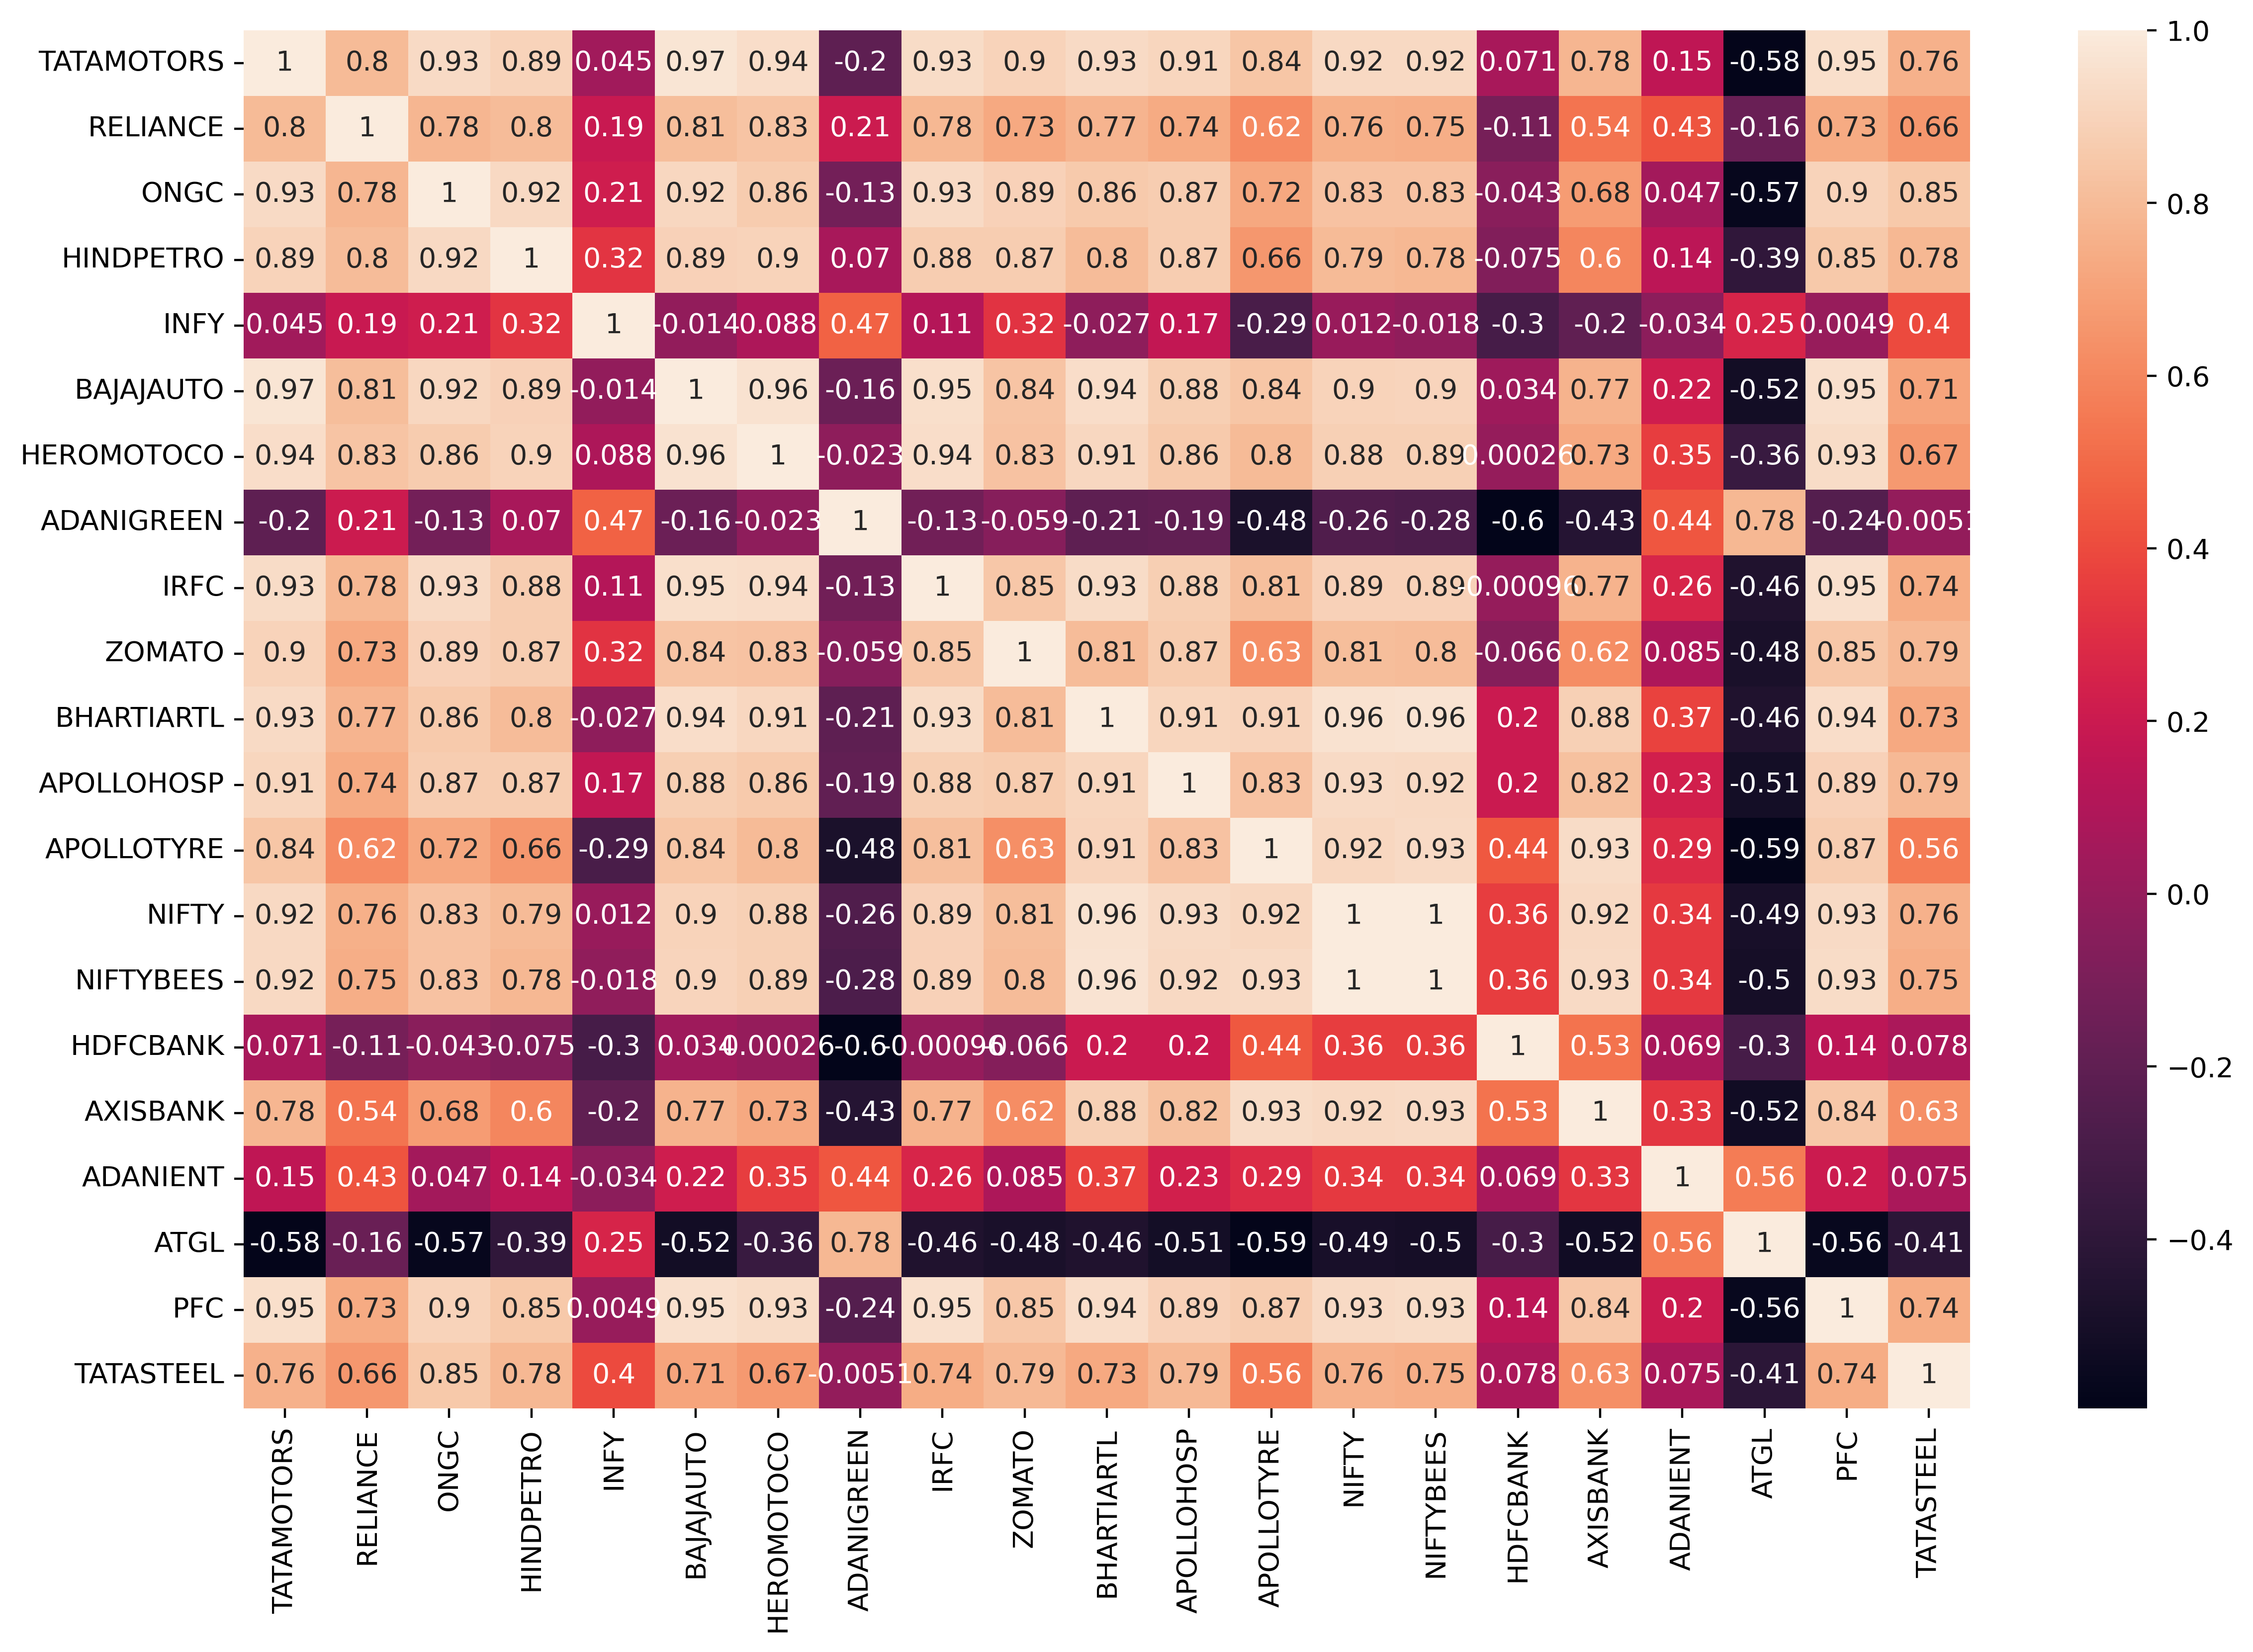

In [6]:
import seaborn as sb
from matplotlib.pyplot import figure
figure(figsize=(14, 9), dpi=400)
sb.heatmap(corr_matrix, annot = True)

making an algorithm which finds the pairs which are well suited for the pairs trading task (this algorithm finds the pairs with the p value < 0.05 and prints them out for us to decide which pairs to use)

In [7]:
def pairs_finding(data):
    n = data.shape[1]
    keys = list(data.keys())
    score_matrix = np.zeros((n, n))
    pvalue_matrix = np.ones((n, n))
    pairs_total = []
    pairs = []
    pvaluespairs = []

    data_columns = [data[key] for key in keys]

    for i in range(n):
        for j in range(i + 1, n):
            S1 = data_columns[i]
            S2 = data_columns[j]
            score, pvalue, _ = coint(S1, S2)
            score_matrix[i, j] = score
            pvalue_matrix[i, j] = pvalue
            pairs_total.append((keys[i], keys[j]))
            if pvalue < 0.05:
                pairs.append((keys[i], keys[j]))
                pvaluespairs.append(pvalue)
    
    return score_matrix, pvalue_matrix, pairs, pairs_total, pvaluespairs

In [8]:
scores, pvalues, pairs, pairs_total, pvalueforpairs = pairs_finding(df)

Here as we can see the pair ZOMATO and ONGC have the least p value of 3.7e-5 so we pick that pair

In [9]:
pvalueforpairs, pairs, scores

([0.0020266215518050077,
  0.024323097592261752,
  0.04248821483697903,
  0.03779359063345729,
  0.024749042736250077,
  0.029675426445110648,
  3.7017389528919436e-05,
  0.031537420159565815,
  0.014318339242434308,
  0.02570130916009806,
  0.004680771996016282,
  0.03555534744016866,
  0.009140853835630309,
  0.014249518843155042,
  0.0239427833365652,
  0.002120299554107012,
  0.0037149439633564715,
  0.020371929595182567,
  0.017358156234022426],
 [('TATAMOTORS', 'ZOMATO'),
  ('TATAMOTORS', 'APOLLOHOSP'),
  ('RELIANCE', 'HINDPETRO'),
  ('RELIANCE', 'HEROMOTOCO'),
  ('RELIANCE', 'ZOMATO'),
  ('ONGC', 'HINDPETRO'),
  ('ONGC', 'ZOMATO'),
  ('INFY', 'ADANIGREEN'),
  ('HEROMOTOCO', 'ZOMATO'),
  ('IRFC', 'PFC'),
  ('ZOMATO', 'BHARTIARTL'),
  ('ZOMATO', 'TATASTEEL'),
  ('BHARTIARTL', 'APOLLOHOSP'),
  ('BHARTIARTL', 'NIFTY'),
  ('BHARTIARTL', 'NIFTYBEES'),
  ('APOLLOHOSP', 'NIFTY'),
  ('APOLLOHOSP', 'NIFTYBEES'),
  ('APOLLOHOSP', 'PFC'),
  ('NIFTY', 'NIFTYBEES')],
 array([[ 0.        , -2.

In [10]:
scores.shape

(21, 21)

In [11]:
len(pairs_total)

210

In [12]:
# Here let's take the pairs with the least pvalue which are ZOMATO and ONGC

In [13]:
S2 = df['ONGC']
S1 = df['ZOMATO']

plotting the heatmap again but only for pairs with pvalue less than 0.05

[('TATAMOTORS', 'ZOMATO'), ('TATAMOTORS', 'APOLLOHOSP'), ('RELIANCE', 'HINDPETRO'), ('RELIANCE', 'HEROMOTOCO'), ('RELIANCE', 'ZOMATO'), ('ONGC', 'HINDPETRO'), ('ONGC', 'ZOMATO'), ('INFY', 'ADANIGREEN'), ('HEROMOTOCO', 'ZOMATO'), ('IRFC', 'PFC'), ('ZOMATO', 'BHARTIARTL'), ('ZOMATO', 'TATASTEEL'), ('BHARTIARTL', 'APOLLOHOSP'), ('BHARTIARTL', 'NIFTY'), ('BHARTIARTL', 'NIFTYBEES'), ('APOLLOHOSP', 'NIFTY'), ('APOLLOHOSP', 'NIFTYBEES'), ('APOLLOHOSP', 'PFC'), ('NIFTY', 'NIFTYBEES')]


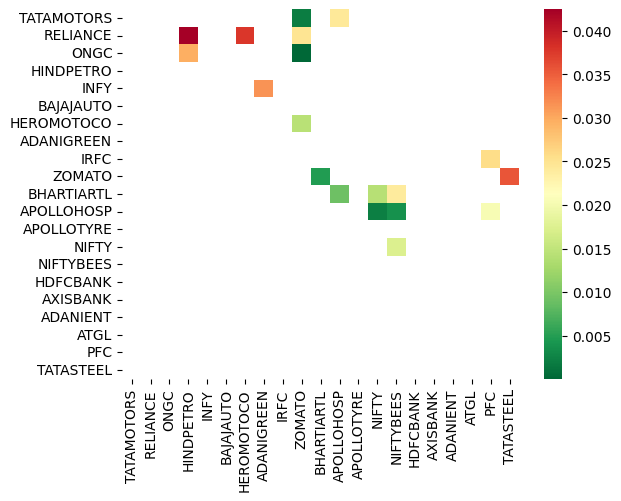

In [14]:
import seaborn
seaborn.heatmap(pvalues, cmap='RdYlGn_r' 
                , mask = (pvalues >= 0.05),
                xticklabels=names, yticklabels=names
                )
print(pairs)

In [15]:
X = S1.values.reshape(-1, 1)
y = S2.values

plotting the spread of the pair now, used linear regression to get the coefficient for the linear combination to construct between the pair. (Engle-Granger method)

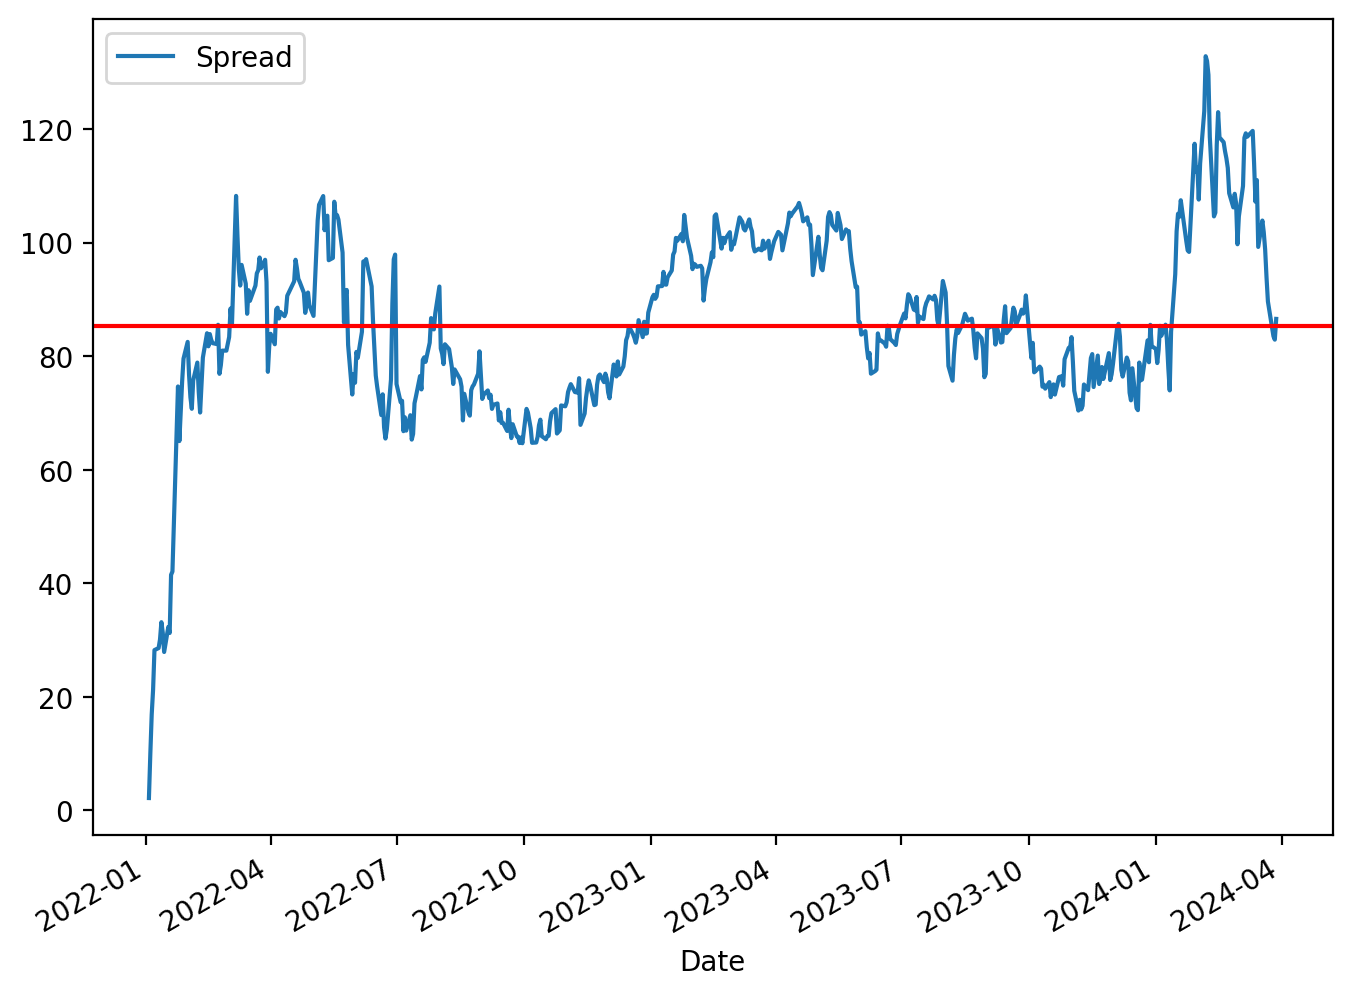

In [16]:
model = LinearRegression()
model.fit(X, y)
b = model.coef_[0]
spread = S2 - b * S1

plt.figure(figsize=(8, 6), dpi=200)
spread.plot()
plt.axhline(np.mean(spread), color='red')
plt.legend(['Spread'])
plt.show()

Checking the ratio graph as well to check which one is better

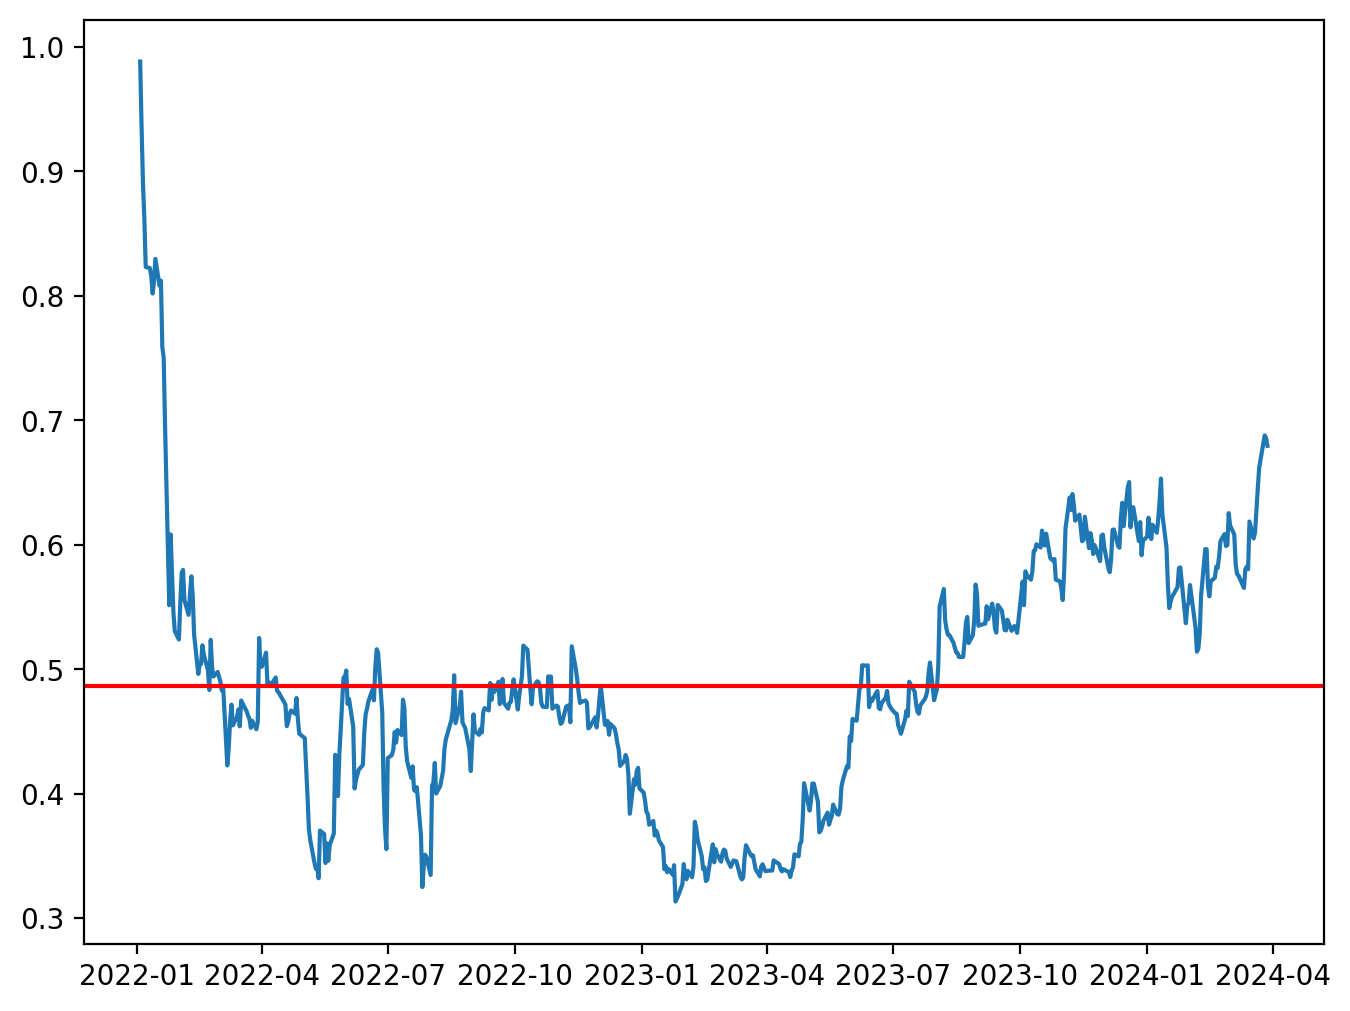

In [17]:
# ratio
figure(figsize=(8, 6), dpi=200)
ratio = S1 / (S2)
plt.plot(ratio)
plt.axhline(np.mean(ratio), color='red')

Calculating the adfuller stat for them both to check, as we can see the pvalue of the spread is lesser so we will pick that one

In [18]:
ad_spread = adfuller(spread)
ad_ratio = adfuller(ratio)

In [19]:
ad_spread

(-5.339930550049074,
 4.523663011613026e-06,
 0,
 552,
 {'1%': -3.4422521197633187,
  '5%': -2.866790184232015,
  '10%': -2.569566175304558},
 2990.417551090892)

In [20]:
ad_ratio

(-4.5520917541848185,
 0.00015814328433065927,
 0,
 552,
 {'1%': -3.4422521197633187,
  '5%': -2.866790184232015,
  '10%': -2.569566175304558},
 -2852.263976412797)

Normalizing the spread

In [21]:
def zscore(list):
    return (list - np.mean(list)) / np.std(list)

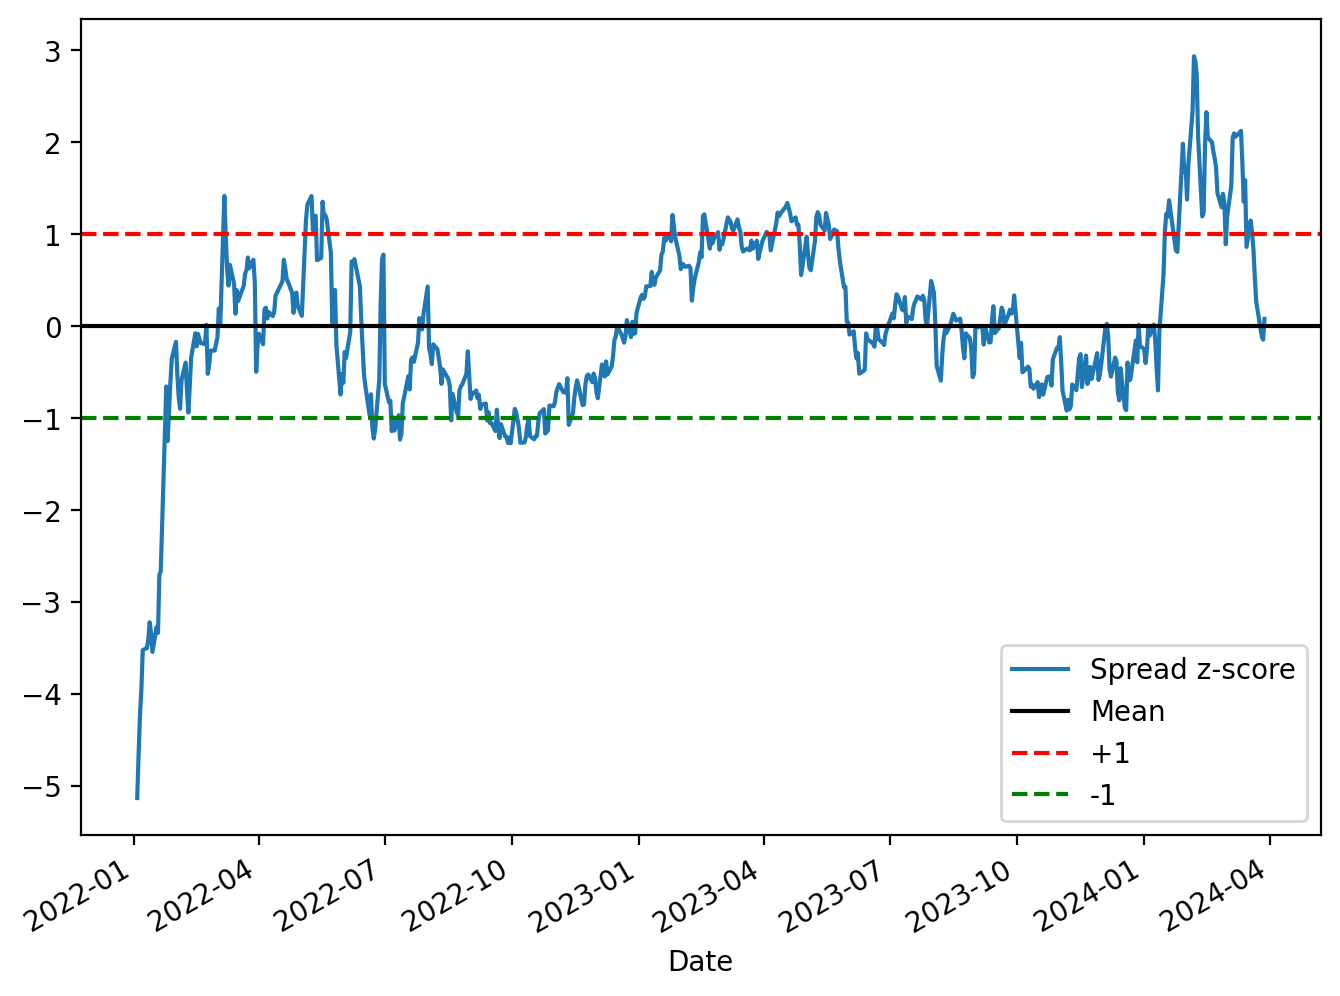

In [22]:
figure(figsize=(8, 6), dpi=200)
zscore(spread).plot()
plt.axhline(zscore(spread).mean(), color='black')
plt.axhline(1.0, color='red', linestyle='--')
plt.axhline(-1.0, color='green', linestyle='--')
plt.legend(['Spread z-score', 'Mean', '+1', '-1'])

Now, using the moving averages to compute the z-score of the spread at each given time. This will tell us whether it's a good idea to enter a position at this time.

C:\Users\shrey\AppData\Local\Temp\ipykernel_11412\865304414.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  betas.append(model.params[1])
C:\Users\shrey\AppData\Local\Temp\ipykernel_11412\865304414.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  betas.append(model.params[1])
C:\Users\shrey\AppData\Local\Temp\ipykernel_11412\865304414.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  betas.append(model.params[1])
C:\Users\s

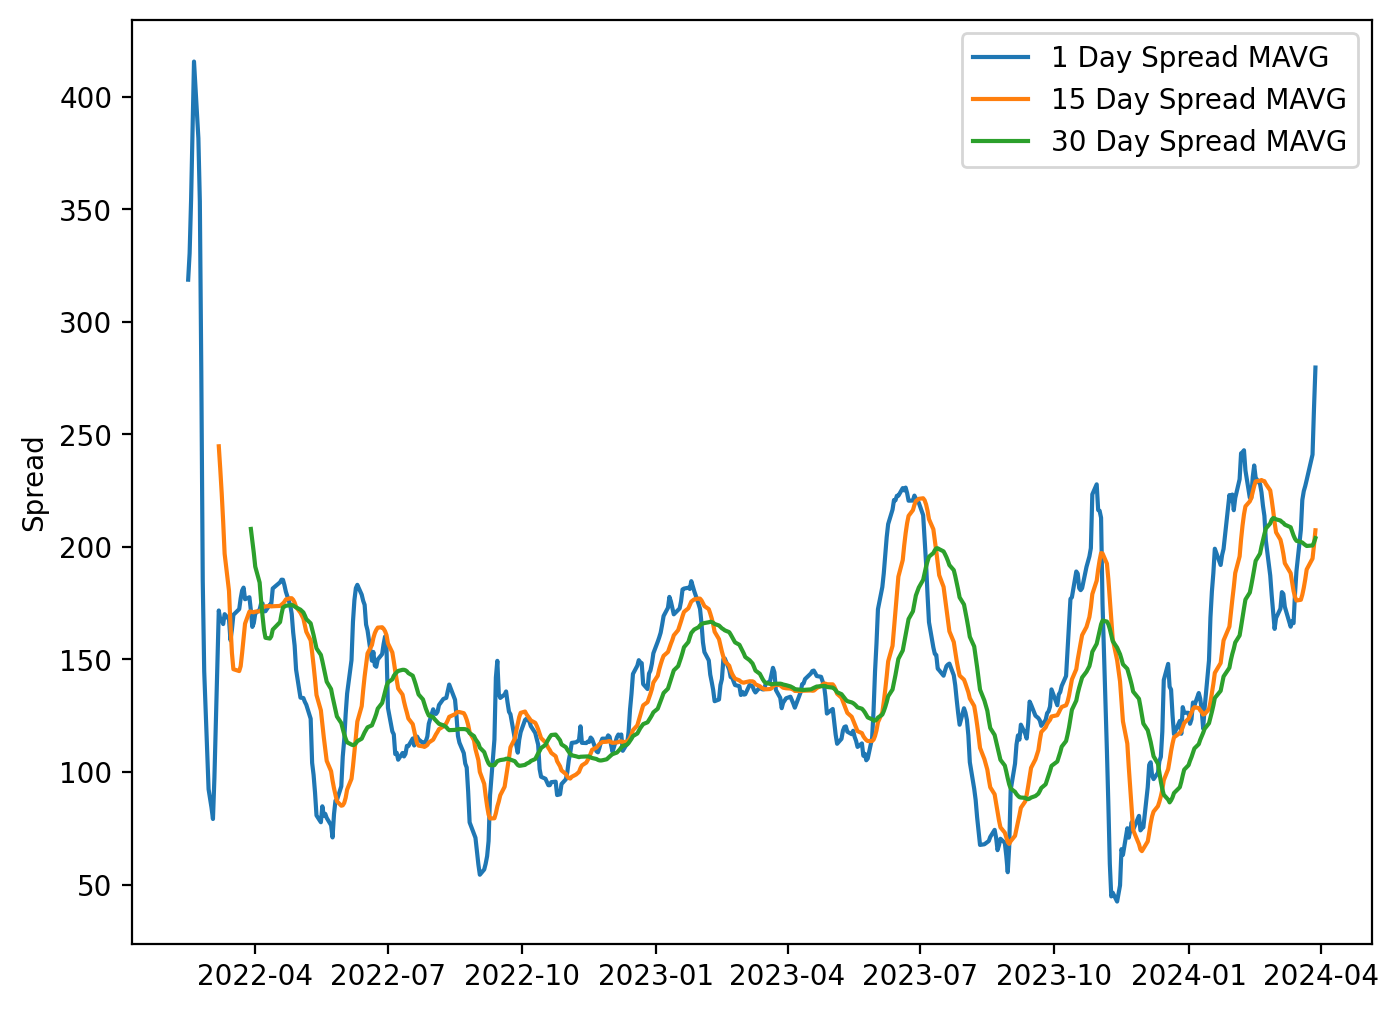

In [23]:
def rolling_beta(S1, S2, window):
    betas = []
    for i in range(len(S1) - window + 1):
        Y = S1[i:i+window]
        X = S2[i:i+window]
        X = sm.add_constant(X)
        model = sm.OLS(Y, X).fit()
        betas.append(model.params[1])
    return pd.Series(betas, index=S1.index[window-1:])

rolling_betas = rolling_beta(S1, S2, 30)

spread = S2 - rolling_betas * S1
spread.name = 'spread'

# 1 day MA
spread_mavg1 = spread.rolling(window=1).mean()
spread_mavg1.name = 'spread 1d mavg'

# 15 day MA
spread_mavg5 = spread.rolling(window=15).mean()
spread_mavg5.name = 'spread 15d mavg'

# 30 day MA
spread_mavg30 = spread.rolling(window=30).mean()
spread_mavg30.name = 'spread 30d mavg'
figure(figsize=(8, 6), dpi=200)
plt.plot(spread_mavg1.index, spread_mavg1.values, label='1 Day Spread MAVG')
plt.plot(spread_mavg5.index, spread_mavg5.values, label='15 Day Spread MAVG')
plt.plot(spread_mavg30.index, spread_mavg30.values, label='30 Day Spread MAVG')

plt.legend()
plt.ylabel('Spread')
plt.show()

As the 30 day moving avg would be better to apply, we use that

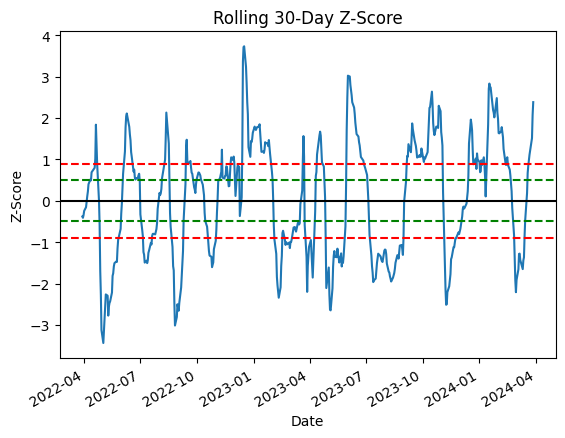

In [24]:
std_30 = spread.rolling(window=30).std()
std_30.name = 'std 30d'

zscore_30_1 = (spread_mavg1 - spread_mavg30) / std_30
zscore_30_1.name = 'z-score'

zscore_30_1.plot()
plt.axhline(0, color='black')
plt.axhline(0.9, color='red', linestyle='--')
plt.axhline(-0.5, color='green', linestyle='--')
plt.axhline(0.5, color='green', linestyle='--')
plt.axhline(-0.9, color='red', linestyle='--')

plt.ylabel('Z-Score')
plt.title('Rolling 30-Day Z-Score')
plt.show()

Making the strategy

In [25]:
class ZScore(bt.Indicator):
    lines = ('zscore',)
    params = (('period', 30),)

    def __init__(self):
        self.addminperiod(self.params.period)
        self.sma = bt.indicators.SimpleMovingAverage(self.data, period=self.params.period)
        self.stddev = bt.indicators.StandardDeviation(self.data, period=self.params.period)

    def next(self):
        self.lines.zscore[0] = (self.data[0] - self.sma[0]) / self.stddev[0]


Here the logic I have used was that whenever the value of the normalized spread went below -exit_threshold then we would sell the stock 1 and buy the stock 2 and close when it reached 0.5 whereas when it went above exit_threshold we would sell 2 and buy 1 and closed the position when it reached entry_threshold.

In [26]:
class PairsTradingStrategy(bt.Strategy):
    params = (
        ('lookback', 30),
        ('entry_threshold', 0.9),
        ('exit_threshold', 0.5),
    )

    def __init__(self):
        self.data0_close = self.datas[0].close
        self.data1_close = self.datas[1].close

        self.spread = self.data0_close - self.data1_close
        self.zscore = ZScore(self.spread, period=self.params.lookback)
        self.position_open = False

    def next(self):
        if self.position_open:
            if abs(self.zscore[0]) < self.params.exit_threshold:
                self.close(self.datas[0])
                self.close(self.datas[1])
                self.position_open = False
        else:
            if self.zscore[0] > self.params.entry_threshold:
                self.sell(data=self.datas[0])
                self.buy(data=self.datas[1])
                self.position_open = True
            elif self.zscore[0] < -self.params.entry_threshold:
                self.buy(data=self.datas[0])
                self.sell(data=self.datas[1])
                self.position_open = True


after optimization I found that the best options for entry and exit thresholds are 0.9 and 0.5 respectively and lookback should be kept at 30

In [27]:
S1 = yf.download('ONGC.NS', start=start, end=end)
S2 = yf.download('ZOMATO.NS', start=start, end=end)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [28]:
cerebro = bt.Cerebro()
cerebro.addstrategy(PairsTradingStrategy)

data0 = bt.feeds.PandasData(dataname=S1)
data1 = bt.feeds.PandasData(dataname=S2)

cerebro.adddata(data0)
cerebro.adddata(data1)

In [29]:
cerebro.broker.set_cash(100000)
cerebro.addsizer(bt.sizers.SizerFix, stake=100)

print(f'Starting Portfolio Value: {cerebro.broker.getvalue()}')
cerebro.run()
print(f'Ending Portfolio Value: {cerebro.broker.getvalue()}')

Starting Portfolio Value: 100000
Ending Portfolio Value: 121399.99885559082


After backtesting found that the final portfolio value would be 121399.99885559082

In [30]:
cerebro.broker.get_value()

121399.99885559082

Used pyfolio to analyze the strategy

In [31]:
cerebro.addanalyzer(bt.analyzers.SharpeRatio, _name='sharperatio')
cerebro.addanalyzer(bt.analyzers.DrawDown, _name='drawdown')
cerebro.addanalyzer(bt.analyzers.Returns, _name='returns')
daily_returns = cerebro.addanalyzer(bt.analyzers.PyFolio)

In [32]:
strats = cerebro.run()
strats

Found out the key metrics to analyze the strategy and find key insights on it

In [33]:
pyfoliozer = strats[0].analyzers.getbyname('pyfolio')
returns, positions, transactions, gross_lev = pyfoliozer.get_pf_items()
daily_returns = positions/positions.shift(1) - 1
print(daily_returns.std())
annualised_return = (cerebro.broker.getvalue() / 100000) ** (1/2.25) - 1 
print(annualised_return)
Sharpe_Ratio = annualised_return / daily_returns.std()
print(Sharpe_Ratio)
cumulative_returns = (1 + returns).cumprod()
Maximum_Drawdown = (cumulative_returns / cumulative_returns.cummax()) - 1
Maximum_Drawdown = min(Maximum_Drawdown)
print(Maximum_Drawdown)
downside_deviation = returns[returns < 0].std()
print(downside_deviation)
risk_free_rate = 0.02
Sortino_Ratio = ( annualised_return - risk_free_rate )/ downside_deviation
print(Sortino_Ratio)
Calmer_Ratio = annualised_return / Maximum_Drawdown
print(Calmer_Ratio)
beta = positions['Data1'].cov(positions['cash']) / positions['cash'].var()
print(beta)
benchmark_return = 0.05
alpha = annualised_return - (risk_free_rate + beta * (benchmark_return - risk_free_rate))
print(alpha)

Data1         NaN
cash     0.033401
dtype: float64
0.09001010878834603
Data1         NaN
cash     2.694812
dtype: float64
-0.0310426759349971
0.002433121590549726
28.77378140914377
-2.899560236908244
0.5476416511427789
0.05358085925406267


c:\Users\shrey\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\_methods.py:49: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


Plotting the returns received graph

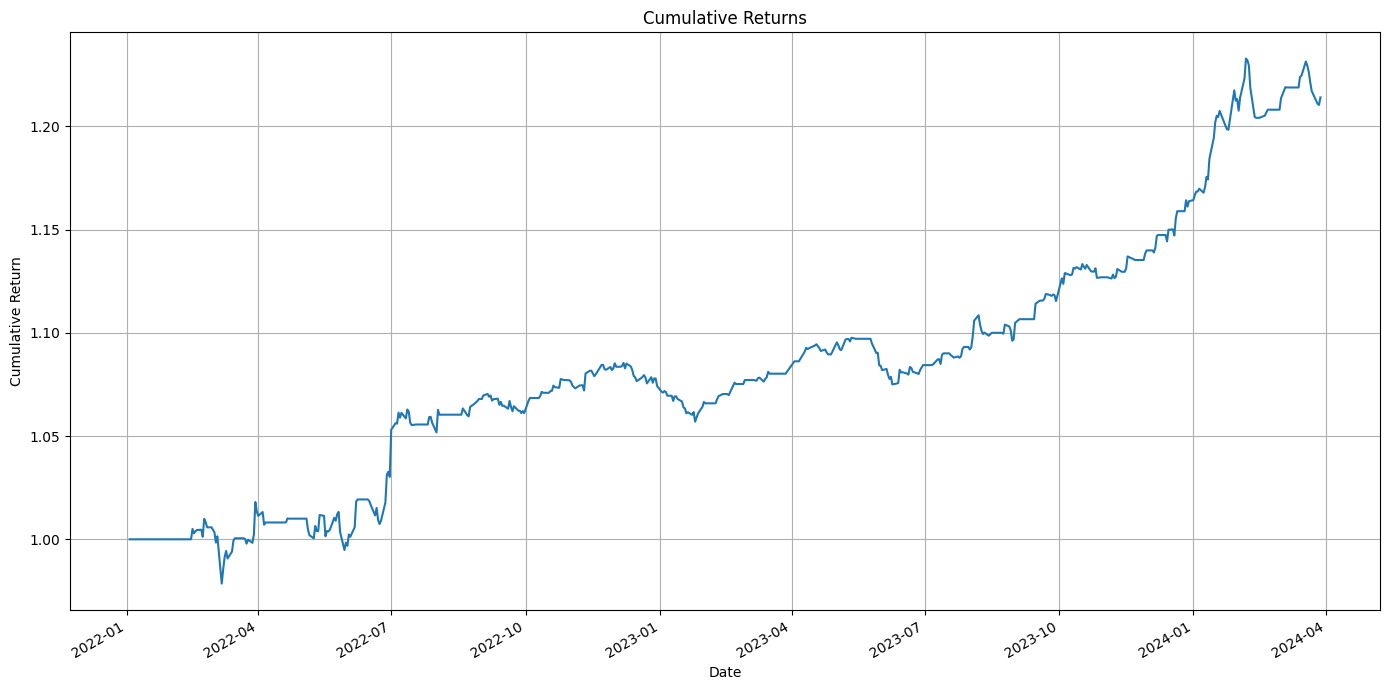

In [34]:
plt.figure(figsize=(14, 7))
cumulative_returns.plot()
plt.title('Cumulative Returns')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.grid(True)
plt.tight_layout()
plt.show()